**Predicting the quality of wine using K-nearest neighbors regression**


For this project we will be using this "Red Wine Quality" dataset found on Kaggle.
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

Wine has many different characteristics that could contribute towards the quality of the wine (on a scale of 1-10)

We are trying to find out the quality of a given wine (on a scale of 1-10) given the different characteristic features (eg.- volatile acidity, residual sugar, pH, etc.)


Here we load all of the libraries needed for visualizations and our prediction models.

In [1]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following object is masked from ‘package:tidyr’:

    matches


Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────

We needed to change the names of the columns because some contained spaces which aren't allowed when you're trying to enter variables into R functions. We also used read_csv to load the data which was downloaded from kaggle and then uploaded into the jupyter notebook folder (and then pushed to the github repository).

In [2]:
names <- c("fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides","free_sulfur_dioxide","total_sulfur_dioxide","density","pH","sulphates","alcohol","quality")


# need to add url?

wine <- read_csv("winequality-red.csv", col_names = names, skip = 1)
wine

Parsed with column specification:
cols(
  fixed_acidity = col_double(),
  volatile_acidity = col_double(),
  citric_acid = col_double(),
  residual_sugar = col_double(),
  chlorides = col_double(),
  free_sulfur_dioxide = col_double(),
  total_sulfur_dioxide = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double()
)



fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5
6.0,0.310,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,6


**Possible predictor variables:**
Fixed acidity, pH, Volatile acidity, Citric acid, Residual sugar, Chlorides, Free sulphur dioxide, Total sulphur dioxide, Density, Sulphates, Alcohol

**Prediction variable:**
Quality

Here the data is split into the training and testing data because we have to use the training data to visualize the relationships between the variables and quality. (also it says in the rubric)

In [3]:
wine_split <- initial_split(wine, prop = 0.75, strata = quality)  
wine_train <- training(wine_split)   
wine_test <- testing(wine_split)


To try and find the best predictors for our k-nn regression model, we plot each factor against quality

All of these variables have a certain correlation and influence in determining the quality of wine. 
Visualize using bar graphs and histograms the relationship between quality and all the other variables to find out what variables we should take into consideration. 

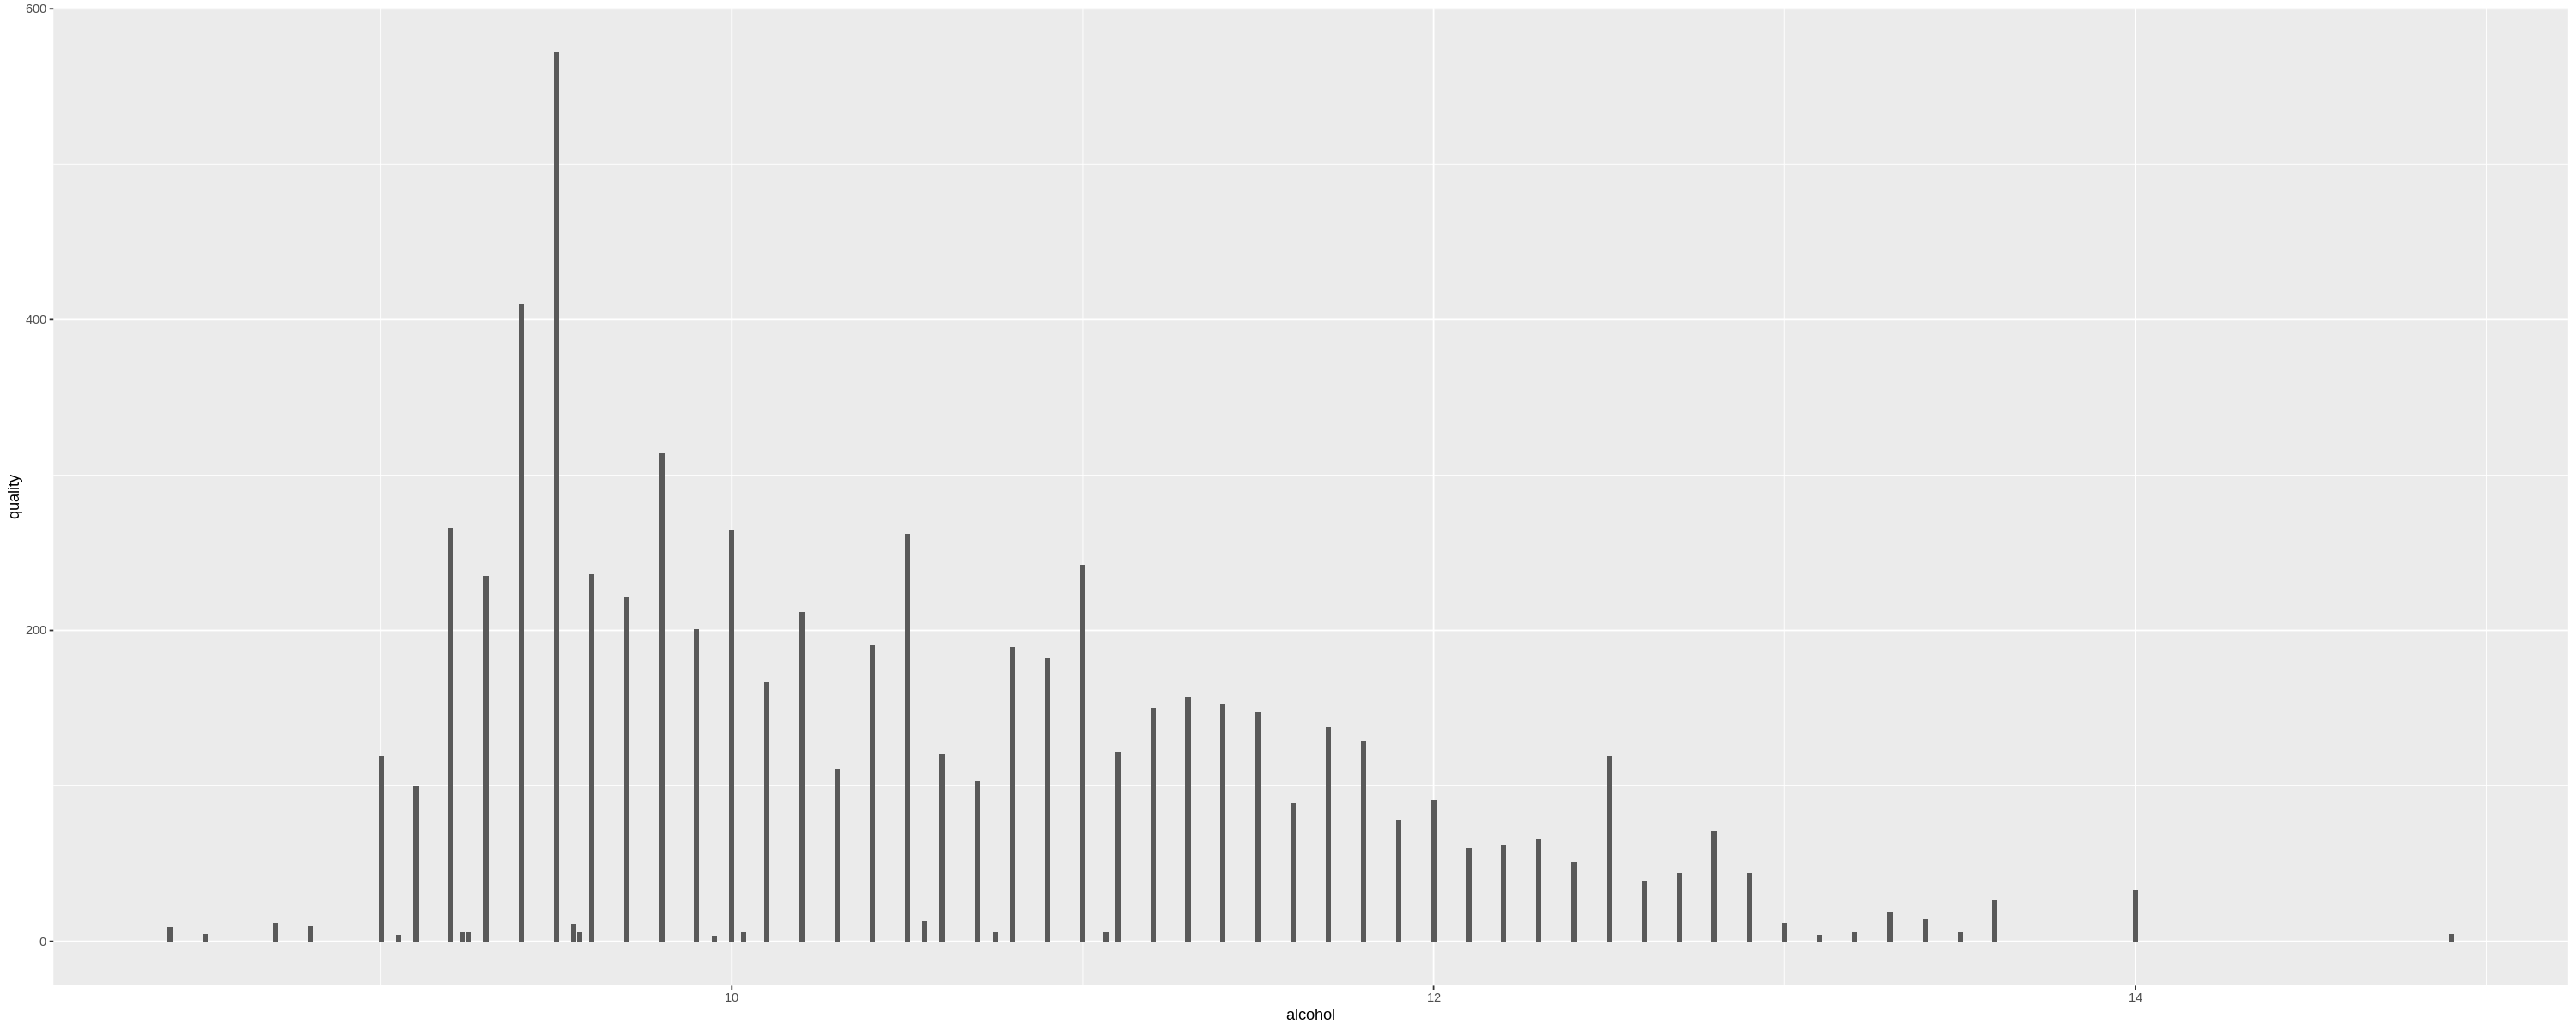

In [4]:
options(repr.plot.width = 25, repr.plot.height = 10)

relationships <- wine_train %>%
                    ggplot(aes(x = alcohol, y = quality)) +
                    geom_bar(stat = "identity")

relationships



We expect to find a trend in the variables compared to wine quality and be able to use that to predict the quality of wine using knn-nearest neighbors regression model. 

The impact that our findings could have are:
We could find that wine quality is not only dependant on variables such as alcohol, but also variables such as citric acid, chlorides and sulphates. This could be useful information for wine manufacturers to create better quality wine.


Future questions this exploration could lead to are:
How does wine quality affect the price of wine?
How does quality affect the popularity of certain kinds of wine?
